# Generalized Machine Learning 

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_context('notebook')
sns.set_style('whitegrid')

## The Machine Learning Problem

Given a set of $n$ samples of data such that each sample is represented by more than a single number, e.g. multivariate data that has several attributes or features, create a model that is able to predict unknown properties of each sample. 

_Spatial interpretation_: given data points in a bounded, high dimensional space, define regions of decisions for any point in that space.

### Learning by Example

Given a bunch of examples (data) extract a meaningful pattern upon which to act.

![Learning from examples](figures/learning_from_ex.png)

### Types of Algorithms

Input _training_ data to fit a model which is then used to predict incoming inputs into ...

![Categorized by output type](figures/cat_by_output.png)

### Terminology

<dl style="margin-top:20px">
    <dt>Instance</dt>
        <dd>A single data point or example composed of multiple fields.<br/>Should be able to describe instances as a noun.</dd>
    <dt>Feature</dt>
        <dd>A numeric quantity describing an instance</dd>
    <dt>Target</dt>
        <dd>The property or field that we're trying to predict</dd>
    <dt>Dimension</dt>
        <dd>A semi-bounded region whose range describes all possible values of a feature</dd>
</dl>

## Regression

![regression](figures/regression.png)

**Hypothesis:** Given continuous input data fit a function that is able to predict the continuous value of input given other data.

TODO: add code to generate above image to utils

In [18]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

# Load Dataset 
boston = load_boston()

# Fit a model to the data and target 
model = RandomForestRegressor()
model.fit(boston.data, boston.target)

# Make predictions on the data
predicted = model.predict(boston.data)

print("Predicted Price = {:0.2f} for:".format(predicted[0]))
print("\n".join(["{}: {:0.3f}".format(k,v) for k, v in zip(boston.feature_names, boston.data[0])]))

Predicted Price = 25.45 for:
CRIM: 0.006
ZN: 18.000
INDUS: 2.310
CHAS: 0.000
NOX: 0.538
RM: 6.575
AGE: 65.200
DIS: 4.090
RAD: 1.000
TAX: 296.000
PTRATIO: 15.300
B: 396.900
LSTAT: 4.980


In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

expected = boston.target
print("Random forest regression model on Boston housing dataset")
print("Mean squared error: {}".format(mse(expected, predicted)))
print("R2 score: {}".format(r2_score(expected, predicted)))

Random forest regression model on Boston housing dataset
Mean squared error: 2.2800126482213443
R2 score: 0.9729918901255107


## Classification

![classification](figures/classification.png)

**Hypothesis:** Given labeled input data (with two or more labels), fit a function that can determine for any input, what the label is. 

TODO: add code to generate above image to utils

In [4]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC


iris = load_iris()

model = SVC()
model.fit(iris.data, iris.target)

predicted = model.predict(iris.data)

print("Predicted Class = \"{}\" for:".format(iris.target_names[predicted[0]]))
print("\n".join(["{}: {:0.3f}".format(k,v) for k, v in zip(iris.feature_names, iris.data[0])]))

Predicted Class = "setosa" for:
sepal length (cm): 5.100
sepal width (cm): 3.500
petal length (cm): 1.400
petal width (cm): 0.200


In [5]:
from sklearn.metrics import classification_report

expected = iris.target

print("SVM Classifier on Iris dataset")
print(classification_report(expected, predicted, target_names=iris.target_names))

SVM Classifier on Iris dataset
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       1.00      0.96      0.98        50
  virginica       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150



## Clustering

![clustering](figures/clustering.png)

**Hypothesis:** Given data, determine a pattern of associated data points or clusters via their similarity or distance from one another. 

TODO: add code to generate above image to utils

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cols = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]
data = pd.read_csv("data/customers.txt", usecols=cols)

pca = PCA(n_components=2)
reduced = pca.fit_transform(data)

model = KMeans(n_clusters=3)
model.fit(reduced)

centroids = model.cluster_centers_

In [9]:
from sklearn.metrics import silhouette_score


print("Silhouette score of KMeans (k=3) on the Customer dataset")
print(silhouette_score(reduced, model.labels_))

Silhouette score of KMeans (k=3) on the Customer dataset
0.5229120824043509


In [10]:
# TODO: move to utils and import 
def draw_clusters(model=model, reduced=reduced):
    _, ax = plt.subplots(figsize=(9,6))
    centroids = model.cluster_centers_
    
    for i in range(centroids.shape[0]):
        datapoints = reduced[np.where(model.labels_==i)]
        
        ax.plot(datapoints[:,0],datapoints[:,1], '.')
    
    centers = ax.plot(centroids[:,0],centroids[:,1],'x', markersize=20, mew=5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("principle component 0")
    ax.set_ylabel("principle component 1")    
    
    return ax 

TODO: add code above to utils, and potentially create a new Yellowbrick visualizer from it! 

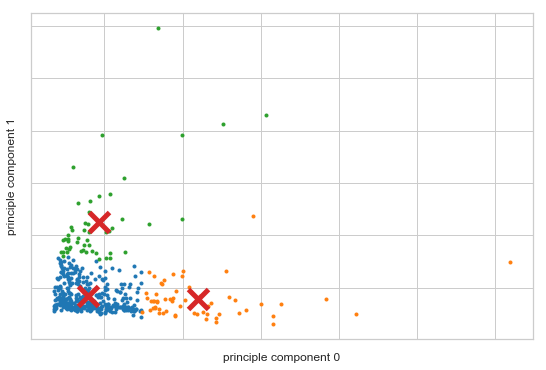

In [11]:
draw_clusters()

## Generalized Machine Learning

The spatial interpretation of machine learning has led to a generalized framework that encompasses a large range of statistical techniques and optimization procedures. The generalization is specified by the primary components of a model:

- Features and training data 
- Algorithm and optimization 
- Parameters and hyperparameters 

### Features

Features are the numeric properties that represent _instances_ - the samples of data that we learn on. All machine learning requires a data set of _sufficient size_ in order to train models; the size of the dataset required often depends on the number of features required for predictability. 

![feature space](figures/feature_space.png)

### Feature Space

Feature space refers to the n-dimensions where your variables live (not including a target variable or class). The term is used often in ML literature because in ML all variables are features (usually) and feature extraction is the art of creating a space with decision boundaries. 

**Target**
- Y ≡ Thickness of car tires after some testing period

**Variables**
- X1 ≡ distance travelled in test
- X2 ≡ time duration of test
- X3 ≡ amount of chemical C in tires

The feature space is R3, or more accurately, the positive quadrant in R3 as all the X variables can only be positive quantities. 

### Mappings and Transformations

Domain knowledge about tires might suggest that the speed the vehicle was moving at is important, hence we generate another variable, X4 (this is the feature extraction part):

X4 = X1 / X2 ≡ the speed of the vehicle during testing.

This extends our old feature space into a new one, the positive part of R4.

A mapping is a function, $\phi$, from R3 to R4:


$$\phi(x1,x2,x3) = (x1,x2,x3,x1x2)$$

![mapping](figures/mapping.jpg)

### Feature Extraction 

Real-world data is often not represented numerically out of the box (e.g. text, images), therefore some transformation must be applied in order to do machine learning. 

![Hand Written Digits](figures/hand_written_digits.png)

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data      # X.shape == (n_samples, n_features)
y = digits.target    # y.shape == (n_samples,)

X[0]                 # Feature representation of first instance

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Feature Engineering

“feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success... Much of the success of machine learning is actually success in engineering features that a learner can understand.” 

Scott Locklin, in “Neglected machine learning ideas”

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

Jason Brownlee, in “Discover Feature Engineering”

### Models

“Model” is an overloaded term.

- **Model family** describes, at the broadest possible level, the connection between the variables of interest. 
- **Model form** specifies exactly how the variables of interest are connected within the framework of the model family. 
- **A fitted model** is a concrete instance of the model form where all parameters have been estimated from data, and the model can be used to generate predictions.


&mdash; Hadley Wickham (http://had.co.nz/stat645/model-vis.pdf)

### Parameters and Hyperparameters

- Models are essentially black boxes, when fitted they learn an internal representation of the decision space which we will generically call _parameters_ here. The parameters (e.g. coefficients of a linear regression) should only be learned from data and not modified by users. 
- Hyperparameters are the attributes supplied by the user that govern the behavior of the model during both the fit and the prediction process. They are called hyperparameters because they are "below the decision space".

## Machine Learning API

Scikit-Learn's primary contribution was an API for machine learning, which has since been adpoted by many other libraries. 

![Choosing the Right Estimator](figures/choosing_estimator.png)

Object-oriented interface centered around the concept of an Estimator: 

> “An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.”

&mdash; Scikit-Learn Tutorial

### Estimators

 - `fit(X,y)` sets the state of the estimator.
 - `X` is usually a 2D `numpy` array of shape `(num_samples, num_features)`.
 - `y` is a 1D array with shape `(n_samples,)`
 - When can `y` be `None`?
 - `Fit` returns `self`. 


In [13]:
class Estimator(object):
    
    def get_params(self):
        """
        Returns a dictionary of all hyperparams 
        """
        pass 

    def set_params(self, **params):
        """
        Sets hyperparams on the instance 
        """
        pass 

    def fit(self, X, y=None, **kwargs):
        """
        Fit the estimator from data
        """
        # Modify state of self 
        return self

### Predictors

 - `predict(X)` returns the class or value
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - Returns a 1D vector with shape `(n_rows,)`
 - `predict_proba()` or `decision_function()` returns a 2D array of shape `(n_rows, n_classes)`

In [14]:
class Predictor(Estimator):
    
    def predict(self, X, **kwargs):
        """
        Predict values for each row in X 
        """
        return y_hat

```python
from sklearn import svm

estimator = svm.SVC(gamma=0.001)
estimator.fit(X, y)
estimator.predict(x)
```

### Models 

 - `score(X, y=None)` returns a descriptive metric between 0 and 1 where 0 is bad and 1 is good. 
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - `y` is optionally a 1D vector with "correct labels"

In [15]:
class Model(Predictor):
    
    def score(self, X, y=None, **kwargs):
        """
        Return a score between 0 and 1
        """
        return score

### Transformers

 - `transform(X)` transforms input data to prepare it for ML.
 - `X` is a 2D `numpy` array with shape `(n_rows, n_features)`
 - `X_prime` is a 2D `numpy` array with shape `(m_rows, m_features)`

In [16]:
class Transformer(Estimator):
    
    def transform(self, X, **kwargs):
        """
        Modifies X and returns a new X' 
        """
        return X_prime

### Data Preprocessing

Scikit-Learn provides a utility package, preprocessing to transform raw feature vectors into representations that assist downstream processing, including:

- **Standardization**: transform data to mean = zero and unit variance. 
- **Scaling**: transform feature to lie between range, usually `[0,1]`
- **Normalization**: scaling features to a unit norm
- **Binarization**: thresholding features to get binary values
- **Label Encoding**: transforming labels to numeric values
- **Imputation**: infer missing values from known parts of the data
- **Data Reduction**: use unsupervised methods to reduce dimensionality.

### Pipelines

The purpose of the pipeline is to assemble several steps that can be cross-validated and operationalized together.

Sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement `fit()` and `transform()` methods. The final estimator only needs to implement `fit()`.

In [17]:
class Pipeline(Transformer):

    @property
    def named_steps(self):
        """
        Sequence of estimators
        """
        return self.steps

    @property
    def _final_estimator(self):
        """
        Terminating estimator
        """
        return self.steps[-1]


## Model Selection

Generalized machine learning and the Scikit-Learn API gives us the ability to fit a large number of models on the same data with ease; so how do you select a model for decision making?

Goals for models:

- Separability 
- Generalizability 
- Interpretability

![Separability](figures/separability.png)

- Models are able to easily distinguish patterns in feature space
- Patterns can be “separated” with a hyperplane or region
- Decreased covariance between features that describe instances
- Loosely: “noiseless”


![Generalizability](figures/generalizability.png)

- Models are able to make predictions on new inputs. 
- Complete view of the decision region, no narrow windows of decision making or limited information gain (sparsity). 
- Loosely: “model is sufficient”


### Model Selection Triple

![Model Selection Triple](figures/model_selection_triple.png)

### A Search Problem

- **Compose** as many model triples as you can think of 
- **Fit and Evaluate** models in parallel with cluster computing 
- **Find** the best model for your application via scoring metrics 

&hellip;

### Visual Steering

![Visual Steering](figures/visual_steering.png)

- Interventions or guidance by human pattern recognition. 
- Humans engage the modeling process through visualization. 
- Overview first, zoom and filter, details on demand. 

## Complexity

- The "dial" that data scientists can turn to adjust the performance of a model is its _complexity_. 
- There is a trade-off in bias (error due to simple models) and variance (error due to complex models)
- Throughout our discussions of models, always ask: "where are the sources of complexity?"

### Bias and Variance

![Bias Variance](figures/bias_variance.png)

- **Bias**: the difference between expected (average) prediction of the model and the correct value. 
- **Variance**: how the predictions for a given point vary between different realizations for the model. 


### Bias/Variance Trade-Off

![Bias Variance Tradeoff](figures/bias_variance_tradeoff.png)

Related to model complexity:
The more parameters added to the model (the more complex), Bias is reduced, and variance increased.  

### Underfitting

![Underfitting](figures/underfitting.png)

Not enough information to accurately model real life. Can be due to high bias, or just a too simplistic model.

### Overfitting

![Overfitting](figures/overfitting.png)

Create a model with too many parameters or is too complex. “Memorization of the data” - and the model can’t generalize very well. 

### Cross-Validation

![Cross-Validation](figures/cross_validation.png)

### Sources of Complexity

- Adding and Removing Features 
- Hyperparameters 
- Amount of training data 
- Different algorithmic methods 

### Interpretability

Given two models with similar scoring metrics, select the model that is more explainable. 

Goal: find the _least complex_ model that is adequately predictable. 

## Deployment

While discussing machine learning, it's easy to forget that the purpose of a model is to be used in decision making - the model itself is not the end goal! 

### Saving Models 

Models can be saved to disk or a database for use in applications or for archival purposes:

- **Pickle**: Python-specific model saving, works for any model
- **PMML**: Generic, cross-language model specification, but only for a handful of models.

### Classification/Regression Workflow

![Classification/Regression Workflow](figures/classification_pipeline.png)

### Clustering Workflow

![Clustering Workflow](figures/clustering_workflow.png)

### Data Product Pipeline

![Data Product Pipeline](figures/data_product_pipeline.png)

## Tour of Model Families

### Models: Instance Methods

Compare instances in data set with a similarity measure to find best matches. 

Suffers from curse of dimensionality. 

Focus on feature representation and similarity metrics between instances

 - k-Nearest Neighbors (kNN)
 - Self-Organizing Maps (SOM)
 - Learning Vector Quantization (LVQ)


### Regression Models

Model relationship of independent variables, X to dependent variable Y by iteratively optimizing error made in predictions.

 - Ordinary Least Squares
 - Logistic Regression
 - Stepwise Regression
 - Multivariate Adaptive Regression Splines (MARS)
 - Locally Estimated Scatterplot Smoothing (LOESS)


### Regularization Methods

Extend another method (usually regression), penalizing complexity (minimize overfit)

simple, popular, powerful 

better at generalization

 - Ridge Regression (L2)
 - LASSO (Least Absolute Shrinkage & Selection Operator) (L1)
 - Elastic Net (L1 + L2)


### Decision Trees

Model of decisions based on data attributes. Predictions are made by following forks in a tree structure until a decision is made. Used for classification & regression.

 - Classification and Regression Tree (CART)
 - Decision Stump
 - Random Forest
 - Multivariate Adaptive Regression Splines (MARS)
 - Gradient Boosting Machines (GBM)


### Bayesian Models

Explicitly apply Bayes’ Theorem for classification and regression tasks. Usually by fitting a probability function constructed via the chain rule and a naive simplification of Bayes.

 - Naive Bayes
 - Averaged One-Dependence Estimators (AODE)
 - Bayesian Belief Network (BBN)


### Kernel Methods

Map input data into higher dimensional vector space where the problem is easier to model. Named after the “kernel trick” which computes the inner product of images of pairs of data.

 - Support Vector Machines (SVM)
 - Radial Basis Function (RBF)
 - Linear Discriminant Analysis (LDA)


### Clustering Methods

Organize data into groups whose members share maximum similarity (defined usually by a distance metric). Two main approaches: centroids and hierarchical clustering.

 - k-Means
 - Affinity Propagation
 - OPTICS (Ordering Points to Identify Cluster Structure)
 - Agglomerative Clustering


### Artificial Neural Networks

Inspired by biological neural networks, ANNs are nonlinear function approximators that estimate functions with a large number of inputs.

System of interconnected neurons that activate 

Deep learning extends simple networks recursively

 - Perceptron
 - Back-Propagation
 - Hopfield Network
 - Restricted Boltzmann Machine (RBM)
 - Deep Neural Networks (DBN)


### Ensemble Models

Models composed of multiple weak models that are trained independently and whose outputs are combined to make an overall prediction.

 - Boosting
 - Bootstrapped Aggregation (Bagging)
 - AdaBoost
 - Stacked Generalization (blending)
 - Gradient Boosting Machines (GBM)
 - Random Forest


### Other Models

The list so far is no where near comprehensive, other algorithm and model classes include:

 - Conditional Random Fields (CRF)
 - Markovian Models (HMMs)
 - Dimensionality Reduction (PCA, PLS)
 - Rule Learning (Apriori, Brill)
 - More ...
